# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from concurrent.futures import ThreadPoolExecutor, as_completed

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

## Config

In [3]:
# Configuration Details for openweather API.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


def process_data(c,x):
    try:
        cstats = {}
        cstats['city'] = c
        cstats['lat'] = x['coord']['lat']
        cstats['lng'] = x['coord']['lon']
        cstats['temp'] = x['main']['temp']
        cstats['humidity'] = x['main']['humidity']
        cstats['cloudiness'] = x['clouds']['all']
        cstats['windspeed'] = x['wind']['speed']
        return cstats
    except KeyError as e:
        msg = f"Key Error Missing Key - {e}"
        return msg

def getCityStats(qurl, city):
    try:
        response = requests.get(qurl + city).json()
        #print(qurl + city) ## Debug Only!
    except Exception as e:
        return SystemExit(e)
    except requests.exceptions.RequestException as e:
        return SystemExit(e)
    else:
        if response['cod'] == 200:
            cstats = process_data(city, response)
        elif response['cod'] == "404" and response['message'] == "city not found":
            return f"{city}\n City not found. Skipping..."
        else:
            code = response['cod']
            msg = response['message']
            return SystemExit(f"Error {code} - {msg}")
    return cstats        

# This runner will output a list of dictionaries, using the city stat getter
# This runnder uses a configurable worker setting, to allow for better speed.  
# I have tested it with 5 workers, with fast results, However .....
# BE CAREFUL! OpenWeather API limits you. You will get errors if you reach your limit, and will need to wait!
def runner(searchlist):
    threads = []
    cstat_list = []
    nitems = len(searchlist)
    with ThreadPoolExecutor(max_workers=2) as executor:
        counter = 0 
        for city in searchlist:
            threads.append(executor.submit(getCityStats, query_url, city))
            
        for task in as_completed(threads):
            counter = counter+1
            outtext = f"Processing Record {counter} of {nitems} | "
            rs = task.result()
            if type(rs) is dict:
                cstat_list.append(rs)
                print(outtext, rs['city'])
            else:
                print(outtext, task.result())
    print(len(cstat_list), "Successfully Collected")            
    return cstat_list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Test Check to validate connectivity and reponse format
print(getCityStats(query_url, cities[2]))

{'city': 'jamestown', 'lat': 42.097, 'lng': -79.2353, 'temp': 41.2, 'humidity': 49, 'cloudiness': 1, 'windspeed': 6.91}


In [26]:
# Test Check to validate connectivity and reponse format
print(getCityStats(query_url, 'nocity'))

nocity
 City not found. Skipping...


In [6]:
# Make the call and put into datafrom             
citidata = runner(cities)


Processing Record 1 of 601 |  lebu
Processing Record 2 of 601 |  mataura
Processing Record 3 of 601 |  jamestown
Processing Record 4 of 601 |  rikitea
Processing Record 5 of 601 |  mar del plata
Processing Record 6 of 601 |  anta
Processing Record 7 of 601 |  pallisa
Processing Record 8 of 601 |  zabid
Processing Record 9 of 601 |  port alfred
Processing Record 10 of 601 |  kavieng
Processing Record 11 of 601 |  portland
Processing Record 12 of 601 |  hobart
Processing Record 13 of 601 |  busselton
Processing Record 14 of 601 |  torbay
Processing Record 15 of 601 |  culaman
Processing Record 16 of 601 |  bambous virieux
Processing Record 17 of 601 |  laguna
Processing Record 18 of 601 |  auki
Processing Record 19 of 601 |  port elizabeth
Processing Record 20 of 601 |  bredasdorp
Processing Record 21 of 601 |  jalu
Processing Record 22 of 601 |  tura
Processing Record 23 of 601 |  biak
Processing Record 24 of 601 |  hasaki
Processing Record 25 of 601 |  alianca
 City not found. Skipping

Processing Record 191 of 601 |  goderich
Processing Record 192 of 601 |  ahuimanu
Processing Record 193 of 601 |  teruel
Processing Record 194 of 601 |  clyde river
Processing Record 195 of 601 |  bilibino
Processing Record 196 of 601 |  jaca
Processing Record 197 of 601 |  itarema
Processing Record 198 of 601 |  paracuru
Processing Record 199 of 601 |  zvishavane
Processing Record 200 of 601 |  thompson
Processing Record 201 of 601 |  cherskiy
Processing Record 202 of 601 |  kleck
 City not found. Skipping...
Processing Record 203 of 601 |  veraval
Processing Record 204 of 601 |  nyuksenitsa
Processing Record 205 of 601 |  mrirt
 City not found. Skipping...
Processing Record 206 of 601 |  winnemucca
Processing Record 207 of 601 |  hilo
Processing Record 208 of 601 |  nome
Processing Record 209 of 601 |  broken hill
Processing Record 210 of 601 |  tuktoyaktuk
Processing Record 211 of 601 |  arraial do cabo
Processing Record 212 of 601 |  korem
Processing Record 213 of 601 |  victor har

Processing Record 380 of 601 |  raver
Processing Record 381 of 601 |  puerto madryn
Processing Record 382 of 601 |  los llanos de aridane
Processing Record 383 of 601 |  khuzdar
Processing Record 384 of 601 |  bridlington
Processing Record 385 of 601 |  bafra
Processing Record 386 of 601 |  shimoda
Processing Record 387 of 601 |  nawa
Processing Record 388 of 601 |  bandarbeyla
Processing Record 389 of 601 |  sentyabrskiy
 City not found. Skipping...
Processing Record 390 of 601 |  pedasi
Processing Record 391 of 601 |  hambantota
Processing Record 392 of 601 |  tabiauea
 City not found. Skipping...
Processing Record 393 of 601 |  davila
Processing Record 394 of 601 |  buraydah
Processing Record 395 of 601 |  carnarvon
Processing Record 396 of 601 |  kibala
Processing Record 397 of 601 |  catamarca
Processing Record 398 of 601 |  muros
Processing Record 399 of 601 |  barra do bugres
Processing Record 400 of 601 |  witu
Processing Record 401 of 601 |  staraya toropa
Processing Record 40

Processing Record 569 of 601 |  saint anthony
Processing Record 570 of 601 |  mitzic
Processing Record 571 of 601 |  khonuu
 City not found. Skipping...
Processing Record 572 of 601 |  beringovskiy
Processing Record 573 of 601 |  rudbar
Processing Record 574 of 601 |  lima duarte
Processing Record 575 of 601 |  yamada
Processing Record 576 of 601 |  kazalinsk
 City not found. Skipping...
Processing Record 577 of 601 |  tatawin
Processing Record 578 of 601 |  liverpool
Processing Record 579 of 601 |  pak phanang
Processing Record 580 of 601 |  oksovskiy
Processing Record 581 of 601 |  beihai
Processing Record 582 of 601 |  eydhafushi
Processing Record 583 of 601 |  mahbubnagar
Processing Record 584 of 601 |  valley
Processing Record 585 of 601 |  vila real de santo antonio
Processing Record 586 of 601 |  kuryk
Processing Record 587 of 601 |  noumea
Processing Record 588 of 601 |  krasnoselkup
Processing Record 589 of 601 |  bokoro
Processing Record 590 of 601 |  matay
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
citydatadf = pd.DataFrame(citidata)
citydatadf.to_csv('citydata.csv', index=False)
citydatadf.head(10)

,city,lat,lng,temp,humidity,cloudiness,windspeed
0,lebu,-37.6167,-73.6500,53.56,86,100,10.47
1,mataura,-46.1927,168.8643,52.39,52,4,1.66
2,jamestown,42.0970,-79.2353,41.20,49,1,6.91
3,rikitea,-23.1203,-134.9692,77.32,78,19,17.22
4,mar del plata,-38.0023,-57.5575,52.79,76,0,1.01
5,anta,25.1500,76.3000,87.53,38,88,8.10
6,pallisa,1.1450,33.7094,61.43,95,78,2.21
7,zabid,14.1951,43.3152,87.24,51,75,6.78
8,port alfred,-33.5906,26.8910,59.22,76,0,6.67
9,kavieng,-2.5744,150.7967,84.78,69,9,6.46


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
citydatadf.describe()
## Use MAX to see if there are any over 100.

,lat,lng,temp,humidity,cloudiness,windspeed
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,20.177427,18.445867,62.188587,69.409174,54.284404,7.585138
std,32.888477,89.946989,17.165652,20.533767,40.175463,5.366483
min,-54.800000,-179.166700,15.800000,7.000000,0.000000,0.000000
25%,-6.216700,-59.516700,49.170000,57.000000,8.000000,3.490000
50%,24.366700,23.489500,62.240000,75.000000,64.000000,6.290000
75%,46.433300,90.220100,77.850000,85.000000,96.000000,10.540000
max,78.218600,179.316700,93.940000,100.000000,100.000000,28.950000


In [9]:
# Another way, Return rows with humidity greater than 100.
hundredpluscitiesdf = citydatadf[citydatadf['humidity'] <= 100]

In [10]:
#  Get the indices of cities that have humidity over 100%.
citydatadf.index[citydatadf['humidity'] > 100].tolist()

[]

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = citydatadf[citydatadf['humidity'] <= 100]
clean_city_data.head()

,city,lat,lng,temp,humidity,cloudiness,windspeed
0,lebu,-37.6167,-73.6500,53.56,86,100,10.47
1,mataura,-46.1927,168.8643,52.39,52,4,1.66
2,jamestown,42.0970,-79.2353,41.20,49,1,6.91
3,rikitea,-23.1203,-134.9692,77.32,78,19,17.22
4,mar del plata,-38.0023,-57.5575,52.79,76,0,1.01


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

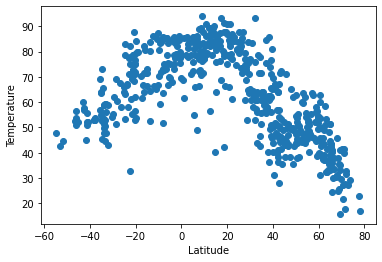

In [12]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

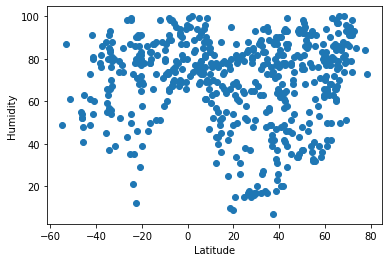

In [13]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

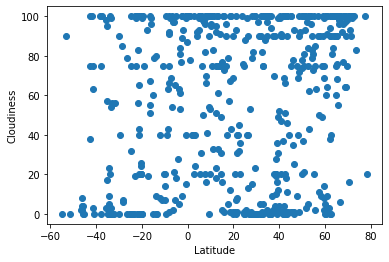

In [14]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

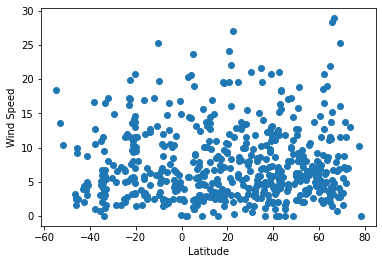

In [15]:
 # Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['lat']
y_values = clean_city_data['windspeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [16]:
x_values = clean_city_data['lat']
y_values = clean_city_data['temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      76.330313
1      78.428786
2      56.825056
3      72.783169
4      76.424666
         ...    
540    55.768381
541    49.744005
542    68.371113
543    69.075213
544    72.100333
Name: lat, Length: 545, dtype: float64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
northhem_city_data = clean_city_data[clean_city_data['lat'] > 0]

y = -0.76x +88.82
The r-value is: 0.6860560495393886


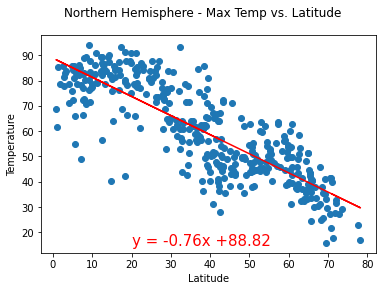

In [18]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Max Temp vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-temp-vs-lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.67x +81.44
The r-value is: 0.5437505769054958


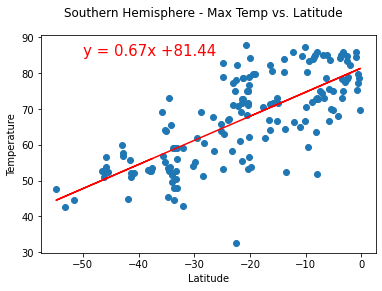

In [19]:
southern_hem_city_data = clean_city_data[clean_city_data['lat'] < 0]
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Max Temp vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-temp-vs-lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.11x +63.71
The r-value is: 0.010567671969555164


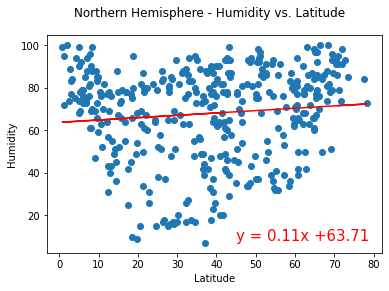

In [20]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Humidity vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-humidity-vs-lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.39x +81.18
The r-value is: 0.09839894254546216


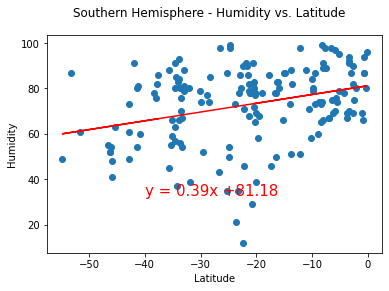

In [21]:
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Humidity vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-40,33),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-humidity-vs-lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.19x +50.9
The r-value is: 0.00973332883055217


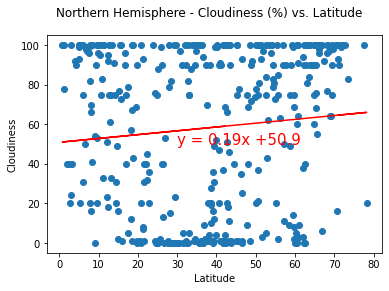

In [22]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(30,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-cloudiness-vs-lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.85x +63.15
The r-value is: 0.08312211285761609


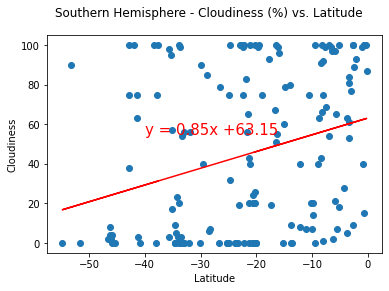

In [23]:
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-40,55),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-cloudiness-vs-lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.11x +63.71
The r-value is: 0.010567671969555164


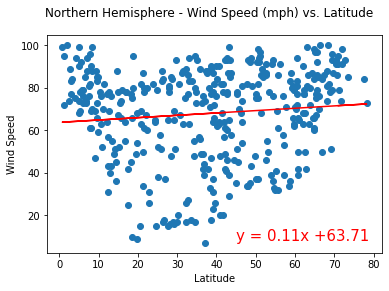

In [24]:
x_values = northhem_city_data['lat']
y_values = northhem_city_data['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Northern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(45,8),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("northern-windspeed-vs-lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.02x +7.83
The r-value is: 0.0026364254224326956


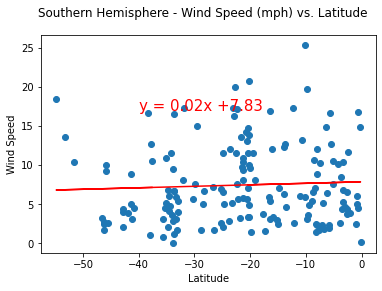

In [25]:
x_values = southern_hem_city_data['lat']
y_values = southern_hem_city_data['windspeed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.suptitle('Southern Hemisphere - Wind Speed (mph) vs. Latitude', fontsize='12')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-40,17),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("southern-windspeed-vs-lat.png")
plt.show()